In [1]:
import importlib
import sys

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append("../src/")

import dataloader
import mitdata
from dataloader import MITDataLoader
from mitdata import MITData

In [7]:
pd.options.display.max_rows = 300

In [2]:
train_loader = MITDataLoader()
df = train_loader.index

In [3]:
labels = df["object_label"].map(lambda x: str(x).split(" "))
expanded = []
for n in range(df.shape[0]):
    for i in range(len(labels[n])):
        dict_element = df.iloc[n].to_dict()
        dict_element["object_label"] = labels[n][i]
        dict_element["index"] = n
        expanded.append(dict_element)
expanded_df = pd.DataFrame(expanded)
expanded_df["object_label"] = expanded_df["object_label"].map(
    lambda x: np.nan if x == 'nan' else x)

In [8]:
label_count = expanded_df[["object_label", "index"]].groupby(
    ["object_label"], as_index=False).count()
label_count.sort_values("index", ascending=False)

,object_label,index
94,man,153
166,woman,100
76,hand,84
161,water,50
70,girl,40
71,grass,32
49,crowd,28
20,boy,27
32,car,26
5,baby,21


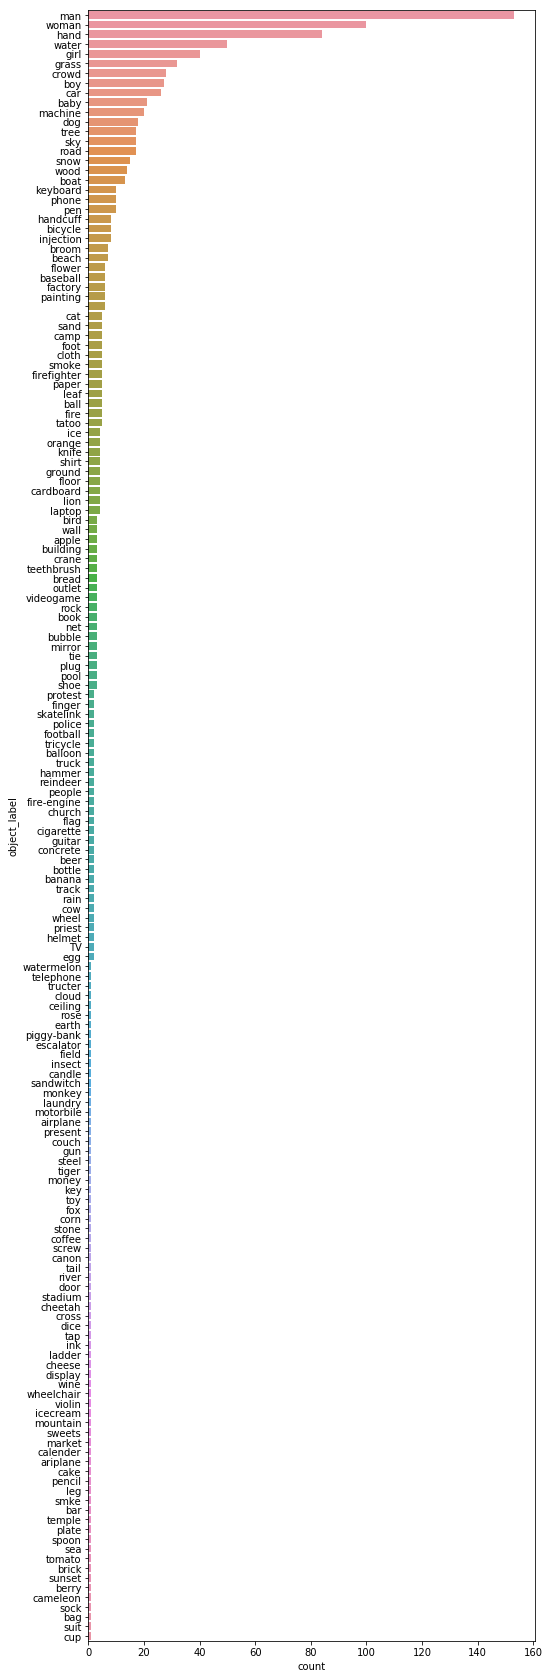

In [6]:
fig, ax = plt.subplots(figsize=(8, 30))
sns.countplot(
    y="object_label",
    data=expanded_df[["index", "object_label"]].dropna(),
    order=expanded_df["object_label"].value_counts().index)